## 1. Importing the Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder , LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib
from sklearn.model_selection import learning_curve


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## 2. Data Collection

In [40]:
df = pd.read_csv('data/patient_data1.csv')
df

,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,Female,35-50,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1821,Male,51-64,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1822,Female,51-64,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1823,Male,65+,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL


In [41]:
df.rename(columns={"C":"Gender"},inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           1825 non-null   object
 1   Age              1825 non-null   object
 2   History          1825 non-null   object
 3   Patient          1825 non-null   object
 4   TakeMedication   1825 non-null   object
 5   Severity         1825 non-null   object
 6   BreathShortness  1825 non-null   object
 7   VisualChanges    1825 non-null   object
 8   NoseBleeding     1825 non-null   object
 9   Whendiagnoused   1825 non-null   object
 10  Systolic         1825 non-null   object
 11  Diastolic        1825 non-null   object
 12  ControlledDiet   1825 non-null   object
 13  Stages           1825 non-null   object
dtypes: object(14)
memory usage: 199.7+ KB


In [43]:
df.isnull().sum()

Gender             0
Age                0
History            0
Patient            0
TakeMedication     0
Severity           0
BreathShortness    0
VisualChanges      0
NoseBleeding       0
Whendiagnoused     0
Systolic           0
Diastolic          0
ControlledDiet     0
Stages             0
dtype: int64

## 3. EDA

In [44]:
df.describe()

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
count,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825
unique,2,4,2,2,3,3,2,2,3,3,5,5,2,6
top,Female,51-64,Yes,No,No,Moderate,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
freq,913,475,1657,984,744,697,976,940,984,625,1008,708,984,648


## 3.1 Univariate Analysis

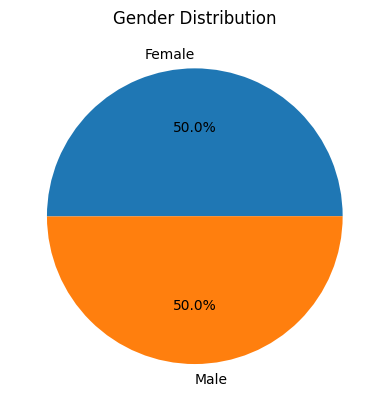

<Figure size 800x400 with 0 Axes>

In [45]:
gender_counts = df['Gender'].value_counts()


plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.figure(figsize=(8,4))
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3168\1212020908.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=df, palette='Reds')


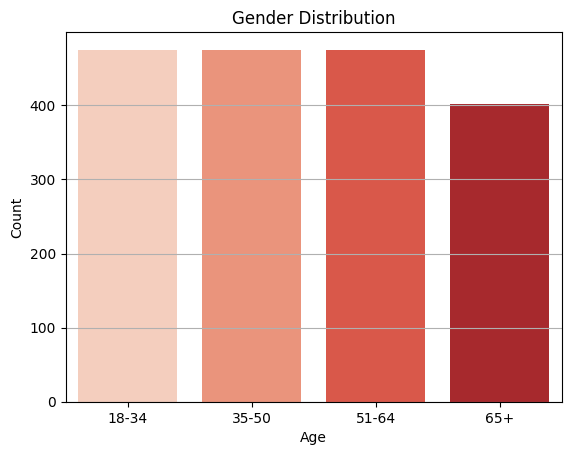

In [46]:
sns.countplot(x='Age', data=df, palette='Reds')
plt.title('Gender Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3168\2620062172.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stages', data=df, palette='Reds' ,order=['NORMAL','HYPERTENSION (Stage-1)','HYPERTENSION (Stage-2)','HYPERTENSIVE CRISIS'])


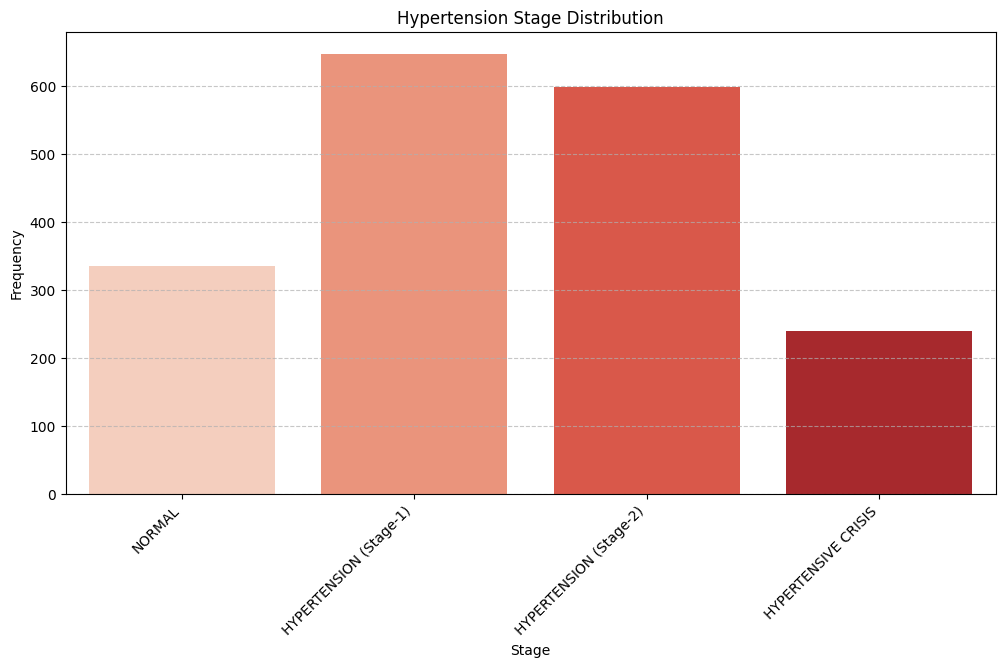

In [47]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Stages', data=df, palette='Reds' ,order=['NORMAL','HYPERTENSION (Stage-1)','HYPERTENSION (Stage-2)','HYPERTENSIVE CRISIS'])

plt.title('Hypertension Stage Distribution')
plt.xlabel('Stage')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.show()

## 3.2 Bivariate anaylsis

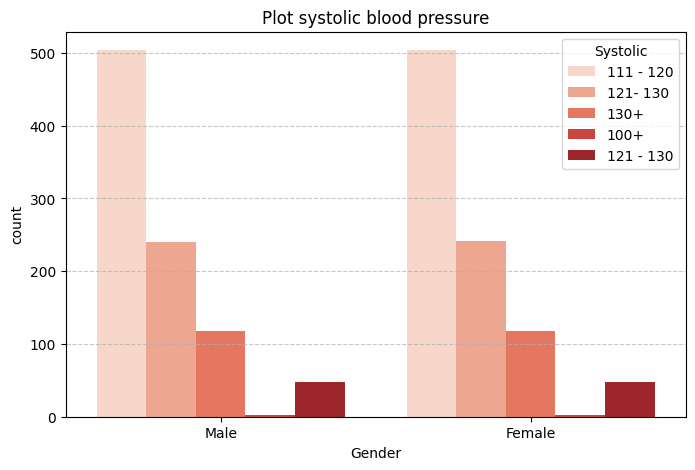

In [48]:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', hue='Systolic', data=df, palette='Reds')
plt.title('Plot systolic blood pressure')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

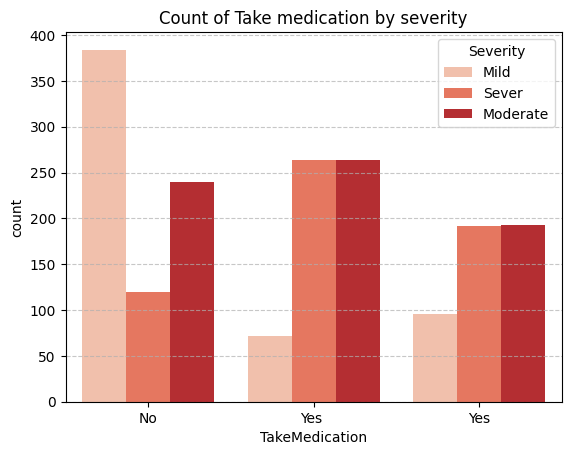

In [49]:
sns.countplot(x='TakeMedication',hue='Severity',data=df,palette='Reds')
plt.title('Count of Take medication by severity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 4. Split the dataset


In [50]:
df

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,Female,35-50,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1821,Male,51-64,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1822,Female,51-64,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1823,Male,65+,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL


In [51]:
stage_corrections = {
    'HYPERTENSION (Stage-2).': 'HYPERTENSION (Stage-2)',
    'HYPERTENSIVE CRISI': 'HYPERTENSIVE CRISIS'
}
df['Stages'] = df['Stages'].replace(stage_corrections)

In [52]:
stages_order = [
    'NORMAL',
    'HYPERTENSION (Stage-1)',
    'HYPERTENSION (Stage-2)',
    'HYPERTENSIVE CRISIS'
]

In [53]:
od = OrdinalEncoder(categories=[stages_order])
df['Stages'] = od.fit_transform(df[['Stages']])

In [54]:
X=df.drop(columns=['Stages'])
y=df['Stages']

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## 4. Data Preprocesing

In [56]:
num_features = ['Systolic', 'Diastolic']
cat_features = [
    'Gender', 'Age', 'History', 'Patient', 'TakeMedication',
    'Severity', 'BreathShortness', 'VisualChanges', 'NoseBleeding',
    'Whendiagnoused', 'ControlledDiet'
]


In [57]:
num_transformer =  Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ordinal" , OrdinalEncoder())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output =False ,handle_unknown='ignore'))
])



In [58]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

In [59]:
import sklearn
sklearn.set_config(transform_output="pandas")

In [60]:
preprocessor.fit_transform(X_train)

,num__Systolic,num__Diastolic,cat__Gender_Female,cat__Gender_Male,cat__Age_18-34,cat__Age_35-50,cat__Age_51-64,cat__Age_65+,cat__History_No,cat__History_Yes,...,cat__VisualChanges_No,cat__VisualChanges_Yes,cat__NoseBleeding_No,cat__NoseBleeding_No,cat__NoseBleeding_Yes,cat__Whendiagnoused_1 - 5 Years,cat__Whendiagnoused_<1 Year,cat__Whendiagnoused_>5 Years,cat__ControlledDiet_No,cat__ControlledDiet_Yes
859,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1022,1.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
170,1.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
292,4.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1146,1.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1294,1.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
860,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1459,4.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


## 5. Model Selection

In [61]:
algorithms = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(probability=True),
}

In [62]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 555 to 1319
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           365 non-null    object
 1   Age              365 non-null    object
 2   History          365 non-null    object
 3   Patient          365 non-null    object
 4   TakeMedication   365 non-null    object
 5   Severity         365 non-null    object
 6   BreathShortness  365 non-null    object
 7   VisualChanges    365 non-null    object
 8   NoseBleeding     365 non-null    object
 9   Whendiagnoused   365 non-null    object
 10  Systolic         365 non-null    object
 11  Diastolic        365 non-null    object
 12  ControlledDiet   365 non-null    object
dtypes: object(13)
memory usage: 39.9+ KB


In [63]:
def plot_curves(sizes, mean_scores, std_scores, label, ax):
	ax.plot(
		sizes,
		mean_scores,
		marker="o",
		label=label
	)

	ax.fill_between(
		x=sizes,
		y1=mean_scores - std_scores,
		y2=mean_scores + std_scores,
		alpha=0.5
	)

In [64]:
def plot_learning_curves(name, algorithm, figsize=(12, 4)):
	model = Pipeline(steps=[
		("pre", preprocessor),
		("alg", algorithm)
	])

	train_sizes, train_scores, test_scores = learning_curve(
		estimator=model,
		X=X_train,
		y=y_train,
		cv=3,
		scoring="accuracy",  # 🔁 classification metric
		n_jobs=-1,
		random_state=42
	)

	mean_train_scores = np.mean(train_scores, axis=1)
	std_train_scores = np.std(train_scores, axis=1)
	train_score = f"{mean_train_scores[-1]:.2f} +/- {std_train_scores[-1]:.2f}"

	mean_test_scores = np.mean(test_scores, axis=1)
	std_test_scores = np.std(test_scores, axis=1)
	test_score = f"{mean_test_scores[-1]:.2f} +/- {std_test_scores[-1]:.2f}"

	fig, ax = plt.subplots(figsize=figsize)

	# training curve
	plot_curves(
		train_sizes,
		mean_train_scores,
		std_train_scores,
		f"Train ({train_score})",
		ax
	)

	# test curve
	plot_curves(
		train_sizes,
		mean_test_scores,
		std_test_scores,
		f"Test ({test_score})",
		ax
	)

	ax.set(xlabel="Training Set Size", ylabel="Accuracy", title=name)
	ax.legend(loc="lower right")

	plt.show()

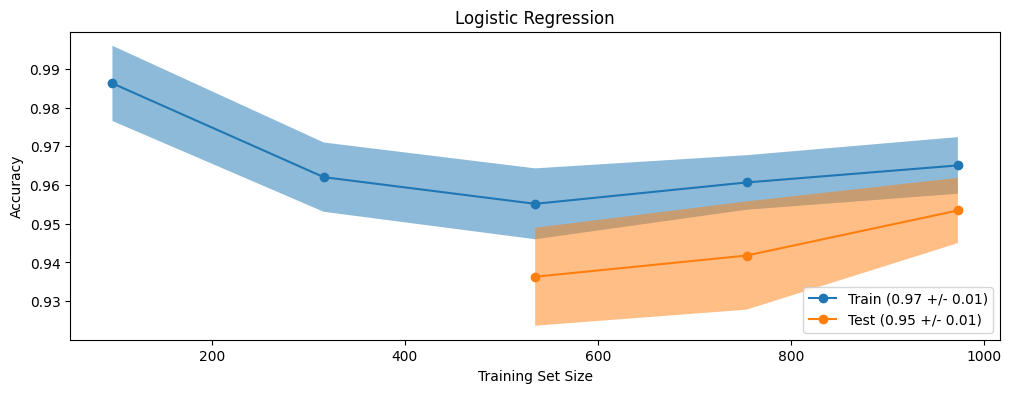

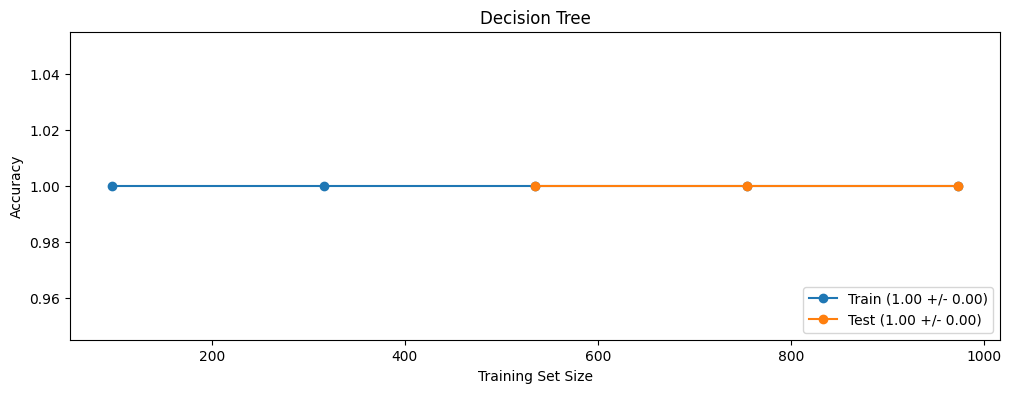

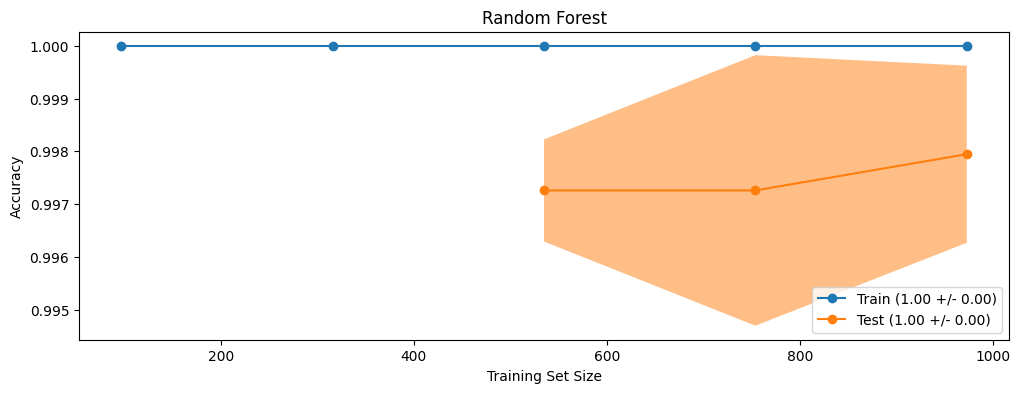

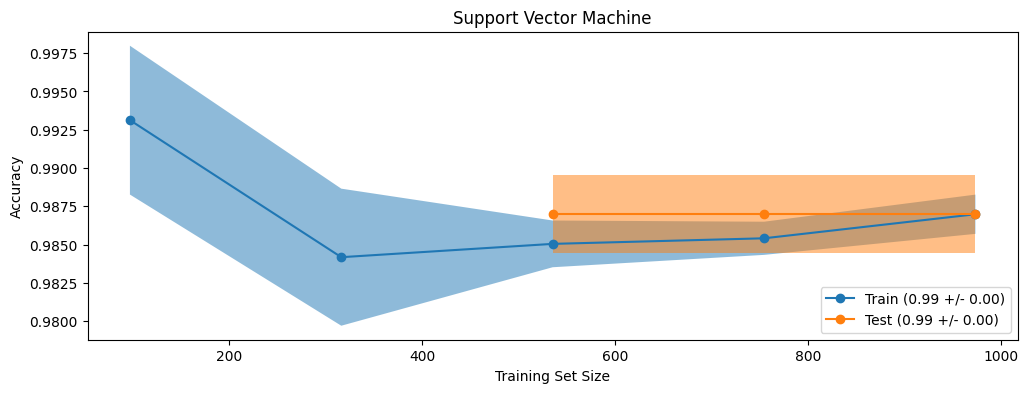

In [65]:
for name, alg in algorithms.items():
	plot_learning_curves(name, alg)

## 6. Model Training

In [66]:
model = Pipeline(steps=[
	("pre", preprocessor),
	("rf", LogisticRegression(multi_class='multinomial', max_iter=500))
])

In [67]:
model.fit(X_train, y_train)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Systolic', 'Diastolic']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Age', 'History',
                                                   'Patient', 'TakeMedication',
                                                   'Severity',
                                                   'BreathShortness',
                                                   'VisualChanges',
                                                   'NoseBleeding',
                                                   'Whendiagnoused',
                                                   'ControlledDiet'])])),
                ('rf',
                 LogisticRegression(max_iter=500, multi_class='multinomial'))])

## 7. Model Evaluation

In [68]:
for name, alg in algorithms.items():
    model = Pipeline(steps=[
        ("pre", preprocessor),
        ("alg", alg)
    ])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')  # or 'weighted'
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"\n{name}:")
    print(f"  Accuracy : {acc:.3f}")
    print(f"  Precision: {prec:.3f}")
    print(f"  Recall   : {rec:.3f}")
    print(f"  F1-Score : {f1:.3f}")

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression:
  Accuracy : 0.962
  Precision: 0.955
  Recall   : 0.965
  F1-Score : 0.959

Decision Tree:
  Accuracy : 1.000
  Precision: 1.000
  Recall   : 1.000
  F1-Score : 1.000

Random Forest:
  Accuracy : 1.000
  Precision: 1.000
  Recall   : 1.000
  F1-Score : 1.000

Support Vector Machine:
  Accuracy : 0.989
  Precision: 0.984
  Recall   : 0.993
  F1-Score : 0.988


In [69]:
joblib.dump(model, "model.joblib")

['model.joblib']

In [70]:
saved_model = joblib.load("model.joblib")
saved_model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Systolic', 'Diastolic']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Age', 'History',
                                                   'Patient', 'TakeMedication',
                                                   'Severity',
                                                   'BreathShortness',
                                                   'VisualChanges',
                                                   'NoseBleeding',
                                                   'Whendiagnoused',
                                                   'ControlledDiet'])])),
                ('alg', SVC(probability=True))])